 
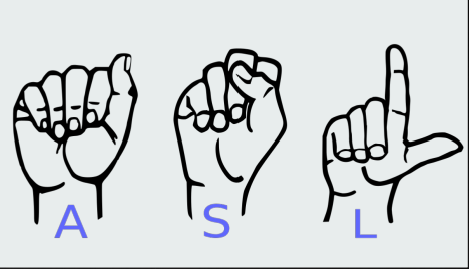

# Importing The Required Libraries

In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Mounting The Google Drive So That We Can Access Data From Gdrive

In [ ]:
# Mounting the google drive so that we can access data from drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading The Training And Testing Data

In [ ]:
# Loading the dataset and saving it in dataframe
train_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

# Reshaping Training Data And Testing Data 

In [ ]:
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)

# Visualizing Training Images To See If They Are Correctly Classified

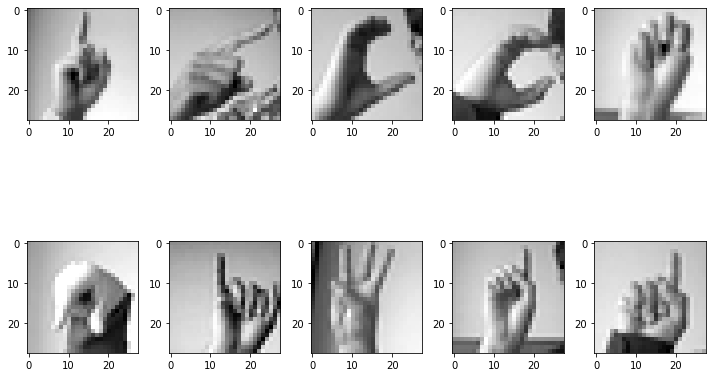

In [ ]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

# Building The CNN Model

In [ ]:
# Building CNN model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Summary Of CNN

In [ ]:
# Represents summary of CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dense_1 (Dense)             (None, 24)                12312     
                                                                 
Total params: 25,703,832
Trainable params: 25,703,704
Non-trainable params: 128
__________________________________________

# Reduce Learning Rate When A Metric Has Stopped Improving

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

# Training The Model

In [ ]:
fitted_values1 = model.fit(x_train, y_train, 
                          batch_size=128,
                          epochs = 5, 
                          validation_data = (x_test, y_test), 
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 204s 944ms/step - loss: 1.0264 - accuracy: 0.8661 - val_loss: 1.8721 - val_accuracy: 0.4898 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 197s 916ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8986 - val_accuracy: 0.7557 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 183s 852ms/step - loss: 4.1229e-04 - accuracy: 1.0000 - val_loss: 0.8872 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 170s 792ms/step - loss: 1.8586e-04 - accuracy: 1.0000 - val_loss: 1.0837 - val_accuracy: 0.7678 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - ETA: 0s - loss: 1.0345e-04 - accuracy: 1.0000
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 170s 789ms/step - loss: 1.0345e-04 - accuracy: 1.0000 - val_loss: 1.1746 - val_accuracy: 0.7620 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 10s 46ms/step - loss: 1.1746 - accuracy: 0.7620
Accuracy of the model is -  76.19910836219788 %


# Building A CNN By Increasing The Layers And Adding Some Padding 

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values2 = model.fit(x_train, y_train, 
                          batch_size=128,
                          epochs = 5, 
                          validation_data = (x_test, y_test), 
                          callbacks = [learning_rate_reduction])

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

# Using Image Data Generator As It Helps Us Augment Images In Real-Time While Model Is Still Training

In [ ]:
image_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False, 
    rotation_range=10, 
    zoom_range = 0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=False, 
    vertical_flip=False)  


image_generator.fit(x_train)

In [ ]:
fitted_values3 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128) ,
                    epochs = 5, 
                    validation_data = (x_test, y_test) , 
                    callbacks = [learning_rate_reduction])

In [ ]:
print("Accuracy of the model with data augmentation is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 50)        28850     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 50)      

# Training Model With More Epochs To See If The Performance Improves

In [ ]:
fitted_values4 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128),
                           epochs = 20, 
                           validation_data = (x_test, y_test) , 
                           callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 80s 368ms/step - loss: 0.8494 - accuracy: 0.7372 - val_loss: 3.5878 - val_accuracy: 0.1050 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 78s 364ms/step - loss: 0.1450 - accuracy: 0.9541 - val_loss: 0.9585 - val_accuracy: 0.6619 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 78s 362ms/step - loss: 0.0588 - accuracy: 0.9825 - val_loss: 0.1374 - val_accuracy: 0.9508 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 78s 361ms/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 1.1276 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 78s 361ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0637 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 78s 363ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.3476 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 7/20
215/215 [==============================] 

In [ ]:
print("Accuracy of the model with data augmentation is  - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 5s 22ms/step - loss: 0.0015 - accuracy: 0.9999
Accuracy of the model with data augmentation is  -  99.98605847358704 %


# Visualizing The Accuracy And Loss In The Form Of Graphs

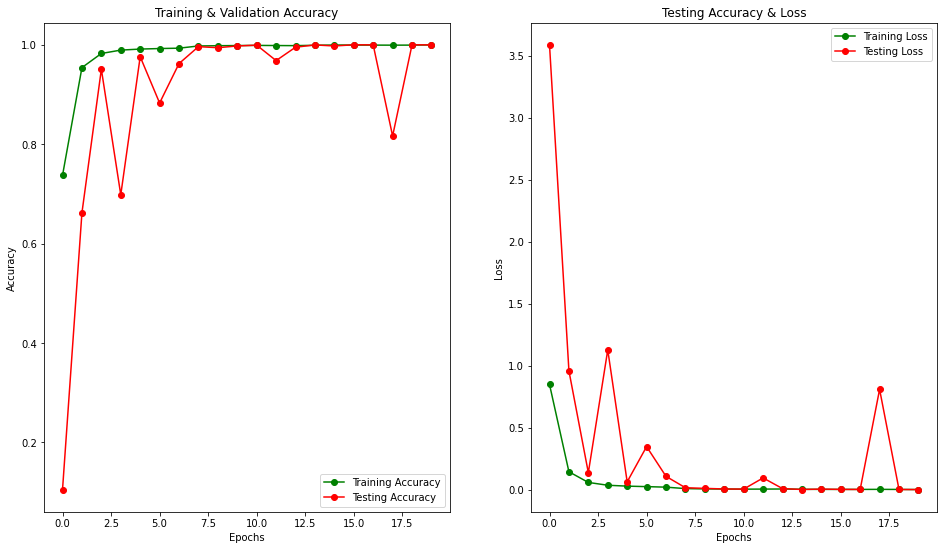

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = fitted_values4.history['accuracy']
train_loss = fitted_values4.history['loss']
val_acc = fitted_values4.history['val_accuracy']
val_loss = fitted_values4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
# Saving the model
model.save("sign_language_cnn_model")

INFO:tensorflow:Assets written to: sign_language_cnn_model/assets
